In [1]:
import numpy as np
from scipy.special import logit
import matplotlib.pyplot as plt
from matplotlib import cm

In [17]:
np.random.seed(1)

In [18]:
B1 = 1.7
B0 = 0.6

In [19]:
x = np.linspace(-1, 2, 11)
y = B1 * x + B0 + np.random.rand(11)

0.9109109109109106
1.711711711711711
0.039441269435046916


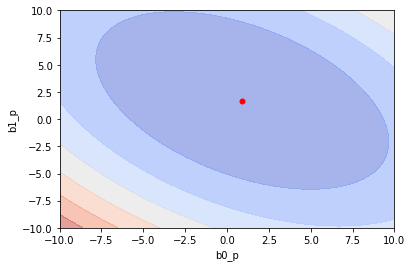

In [26]:
granularity = 1000
b0_p = np.linspace(-10, 10, granularity)
b1_p = np.linspace(-10, 10, granularity)
B0_P, B1_P = np.meshgrid(b0_p, b1_p)
B = np.vstack((B0_P.flatten(), B1_P.flatten()))
X = np.vstack((np.ones((1, x.shape[0])), x)).T
Y_p = np.dot(X, B)
Y = np.repeat(y, granularity * granularity).reshape(y.shape[0], granularity * granularity)
L = np.mean(np.power(Y - Y_p, 2), axis = 0).reshape(granularity, granularity)

fig, ax = plt.subplots()

ax.contourf(B0_P, B1_P, L, cmap = cm.coolwarm, alpha = 0.5)

ax.set_xlabel('b0_p')
ax.set_ylabel('b1_p')

minimum = np.unravel_index(np.argmin(L), L.shape)
print(B0_P[minimum])
print(B1_P[minimum])
print(L[minimum])
ax.plot(B0_P[minimum], B1_P[minimum], markerfacecolor='red', markeredgecolor='red', marker='o', markersize = 5)

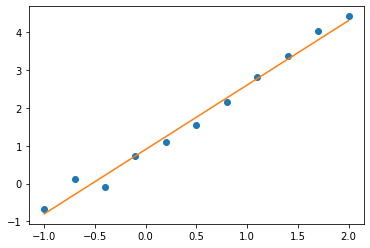

In [25]:
fig, ax = plt.subplots()
plt.plot(x, y, 'o')
plt.plot(x, x * (B1_P[minimum]) + B0_P[minimum])

Note: the estimation of b_0 and b_1 may differ from the constants due to the introduced noise. 

## Logistic regression

In [7]:
x1 = np.random.normal(loc = -1, scale = 2, size = 10)
x2 = np.random.normal(loc = 1, scale = 2, size = 10)
y1 = np.zeros(x1.shape)
y2 = np.ones(x2.shape)
x = np.hstack((x1, x2))
y = np.hstack((y1, y2))

-0.26363636363636367
0.7555555555555555
-4.057542342771956e-05


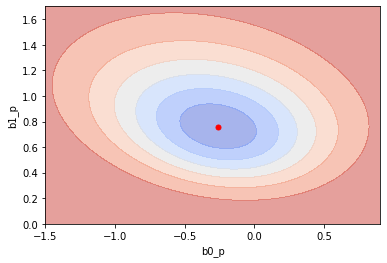

In [8]:
granularity = 100
b0_p = np.linspace(-1.5, 0.9, granularity)
b1_p = np.linspace(0, 1.7, granularity)
B0_P, B1_P = np.meshgrid(b0_p, b1_p)
B = np.vstack((B0_P.flatten(), B1_P.flatten()))
X = np.vstack((np.ones((1, x.shape[0])), x)).T
Y_p = np.exp(np.dot(X, B))/(1 + np.exp(np.dot(X, B)))
Y = np.repeat(y, granularity * granularity).reshape(y.shape[0], granularity * granularity)

# Taking the negative of the loss function so it becomes a minimisation problem
L = -np.prod(np.multiply(np.power(Y_p, Y), np.power(1 - Y_p, 1 - Y)), axis = 0).reshape(granularity, granularity)

fig, ax = plt.subplots()
ax.contourf(B0_P, B1_P, L, cmap = cm.coolwarm, alpha = 0.5)

ax.set_xlabel('b0_p')
ax.set_ylabel('b1_p')

minimum = np.unravel_index(np.argmin(L), L.shape)
print(B0_P[minimum])
print(B1_P[minimum])
print(L[minimum])
ax.plot(B0_P[minimum], B1_P[minimum], markerfacecolor='red', markeredgecolor='red', marker='o', markersize = 5)


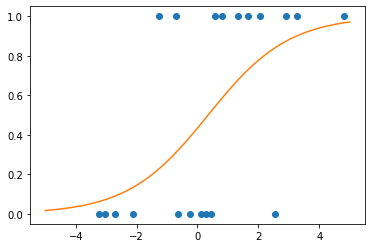

In [9]:

fig, ax = plt.subplots()
ax.plot(x, y, 'o')
x_l = np.linspace(-5, 5, 100)
p = np.exp(x_l * B1_P[minimum] + B0_P[minimum]) / (1 + np.exp(x_l * B1_P[minimum] + B0_P[minimum]))
ax.plot(x_l, p)